# About Randomness

## How to Generate Random Numbers in Python ?

We need the **random** package.

In [28]:
import random as rd

### Generate Integers

In [29]:
rd.randint(0,100)

82

In [30]:
rd.randrange(0,100,10)

10

### Generate Floating Point Numbers

In [31]:
rd.random()

0.1859062658947177

Every time we run random(), we get a new random floating point number between 0 and 1 that is computed based on the previous one using the Mersenne twoister algorithm. These generated numbers in sequence follow an uniform distribution which means that probability of generating any random number between 0 and 1 is equal.

In [32]:
rd.random()

0.9925434121760651

We can fix the first number of the sequence in order to get reproductible results.

In [33]:
rd.seed(1)
[rd.random(),rd.random(),rd.random()]

[0.13436424411240122, 0.8474337369372327, 0.763774618976614]

In [34]:
rd.seed(1)
[rd.random(),rd.random(),rd.random()]

[0.13436424411240122, 0.8474337369372327, 0.763774618976614]

In [35]:
a = 3.75
b = 5.25
(b-a) * rd.random() + a

4.132603538609133

### Select an element in a list

In [36]:
list = [i for i in range(20)]
list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [37]:
rd.choice(list)

15

### Select several elements in a list

In [38]:
rd.sample(list,10)

[14, 15, 12, 6, 3, 7, 0, 16, 17, 9]

In [39]:
[rd.choice(list) for i in range(10)]

[0, 14, 8, 7, 18, 3, 10, 0, 0, 0]

### Shuffle a list

In [40]:
rd.shuffle(list)
list

[16, 15, 4, 9, 5, 1, 2, 14, 19, 10, 7, 3, 8, 18, 11, 13, 6, 12, 0, 17]

### Using a specific distribution

In [41]:
rd.gauss(5,1)

3.0746237852087654

## How to Generate Random Numbers with Numpy ?

In [42]:
import numpy as np

### Generate Integers

In [43]:
np.random.randint(0,100)

79

In [44]:
np.random.randint(0,100,10)

array([74, 76, 97,  0, 30,  3, 81, 64, 38, 67])

### Generate Floating Point Numbers

In [45]:
np.random.rand(10)

array([0.62324715, 0.63835532, 0.32756944, 0.06748934, 0.8805386 ,
       0.45995673, 0.76387272, 0.25388862, 0.59138718, 0.42879516])

In [46]:
np.random.seed(1)
np.random.rand(3)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04])

### Using a Gaussian distribution

In [47]:
np.random.randn(10)

array([-0.80217284, -0.44887781, -1.10593508, -1.65451545, -2.3634686 ,
        1.13534535, -1.01701414,  0.63736181, -0.85990661,  1.77260763])

In [48]:
data = np.random.normal(150,10,1000)

In [49]:
import matplotlib.pyplot as plt

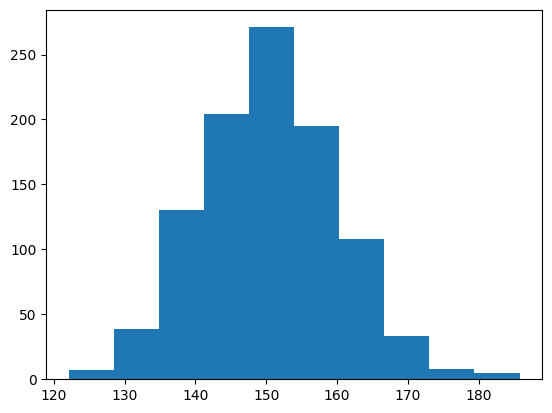

In [50]:
plt.hist(data,bins=10)
plt.show() 

## Magic Cards
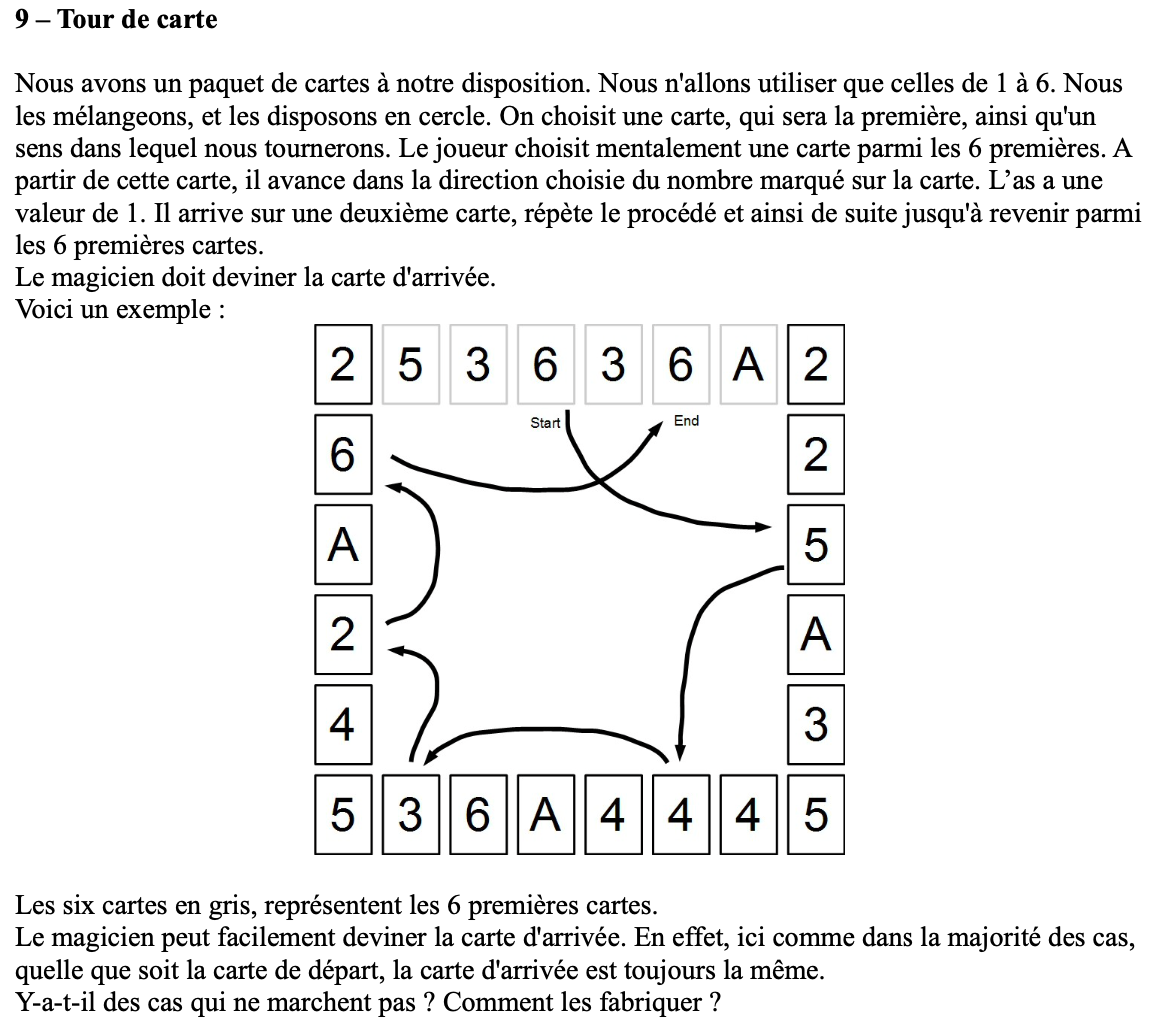

### Define the pack of cards and shuffle it

In [51]:
ranges = [i for i in range(1,7)]

In [52]:
pack = ranges+ranges+ranges+ranges

In [53]:
rd.shuffle(pack)

In [54]:
pack

[4, 3, 3, 2, 6, 1, 2, 1, 2, 1, 5, 1, 6, 4, 3, 2, 5, 5, 5, 4, 6, 6, 4, 3]

### Select a first card (amongst the 6 first), compute the next and propagate

In [55]:
rd.choice([i for i in range(6)])

3

In [56]:
def next_card(rank):
    return pack[rank]+rank

In [57]:
next_card(1)

4

In [58]:
def list_card(rank):
    r = rank
    l = []
    while r < 24:
        l.append(r)
        r = next_card(r)
    l.append(r-24)
    return l 

In [59]:
list_card(1)

[1, 4, 10, 15, 17, 22, 2]

### Why the trick works ?

In [60]:
def last_card(rank):
    l = list_card(rank)
    return l[-1]

In [61]:
last_card(1)

2

In [62]:
[last_card(i) for i in range(6)]

[2, 2, 2, 2, 2, 2]

In [63]:
def last_cards():
    return [last_card(i) for i in range(6)]

In [64]:
len(set([last_card(i) for i in range(6)]))

1

### Is it always working ?

In [65]:
def play(n):
    l = []
    for i in range(n):
        rd.shuffle(pack)
        l.append(len(set(last_cards())))
    return l

In [66]:
l = play(20)

In [67]:
l

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2]

In [68]:
l.count(1)

15

In [69]:
l = play(10000)

In [70]:
l.count(1)

7986

In [71]:
(l.count(1)+0.5*l.count(2)+0.33*l.count(3)+0.25*l.count(4))/10000

0.8990959999999999